# IMPORTS & CONFIGS 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import os
import glob
from scipy import signal
from scipy.stats import norm
from scipy.optimize import curve_fit
import re

# INITIAL DATA PROCESSING

In [25]:
def data_start(dir: str) -> object:
    df = pd.read_csv(dir, sep=';',decimal='.', index_col=False, skiprows=10, usecols=range(4), encoding='iso-8859-1')
    df['datetime'] = pd.to_datetime(df.iloc[:, 0])
    # Drop the original date and time columns by index
    df.drop(df.columns[[0]], axis=1, inplace=True)
    df.replace(-9999, np.nan, inplace=True)
    df = df.dropna()
    
    df['year_month'] = df['datetime'].dt.to_period('M')
    df.drop(df.columns[[-2]], axis=1, inplace=True)
    target_columns = ['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)', 'TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)', 'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)']

    df[target_columns] = df[target_columns].map(
        lambda x: re.sub(r'^\.(\d+)', r'0.\1', x) if isinstance(x, str) else x
    ).astype(float)
    
    monthly_avg = df.groupby('year_month').mean(numeric_only=True)
    monthly_avg.reset_index(inplace=True)

    del df
    monthly_avg['year_month'] = monthly_avg['year_month'].dt.to_timestamp() 
    return monthly_avg.sort_values("year_month")

In [26]:
def plot(df: object) -> None:
    plt.figure(figsize=(10, 5))

    # Plot the 'x' column
    for i in df.columns:
        if i != 'year_month':
            plt.plot(df['year_month'], df[i], linestyle='-', label=i)  

    # Adding titles and labels
    plt.title('Data x Months')
    plt.xlabel('DATA')
    plt.ylabel('YEAR_MOUNTH')

    # Adding a legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

# MAIN

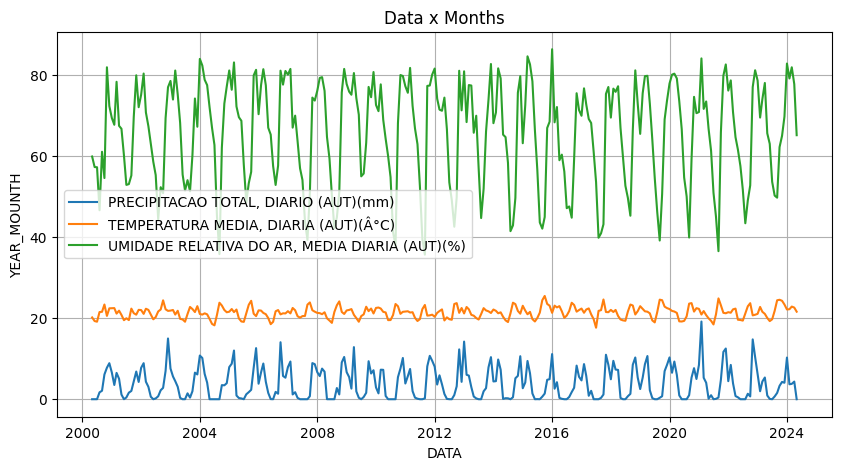

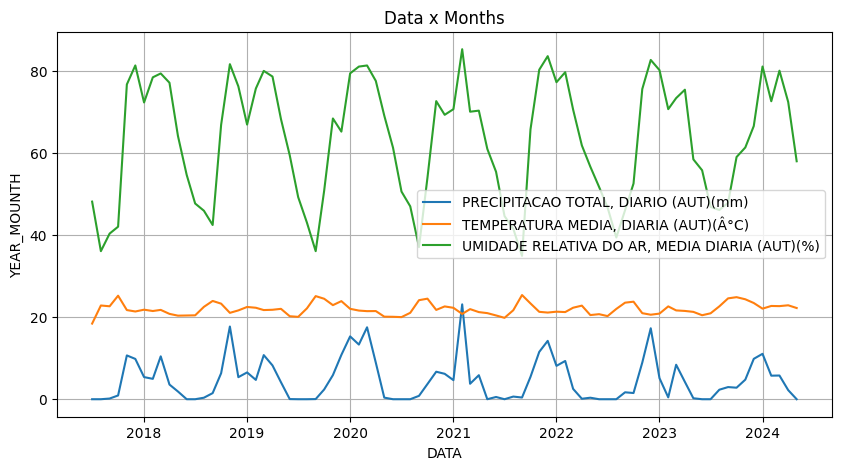

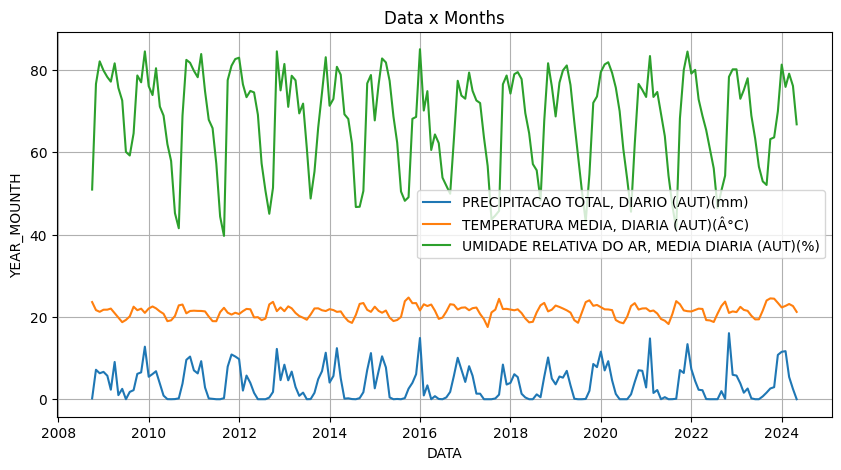

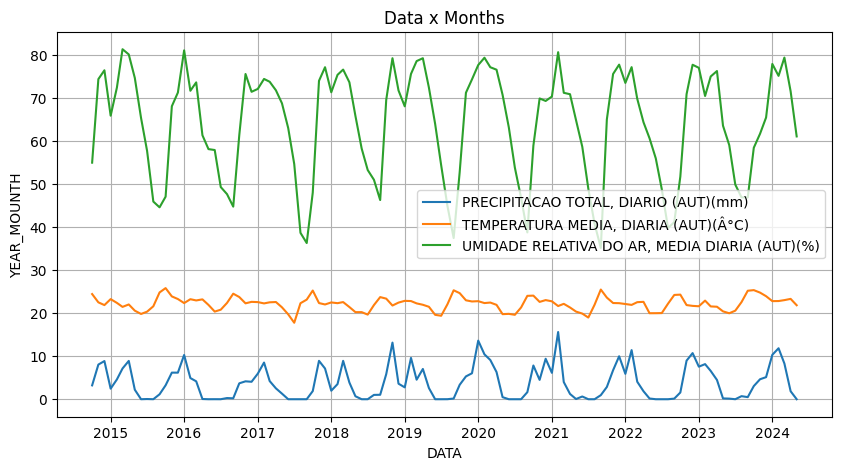

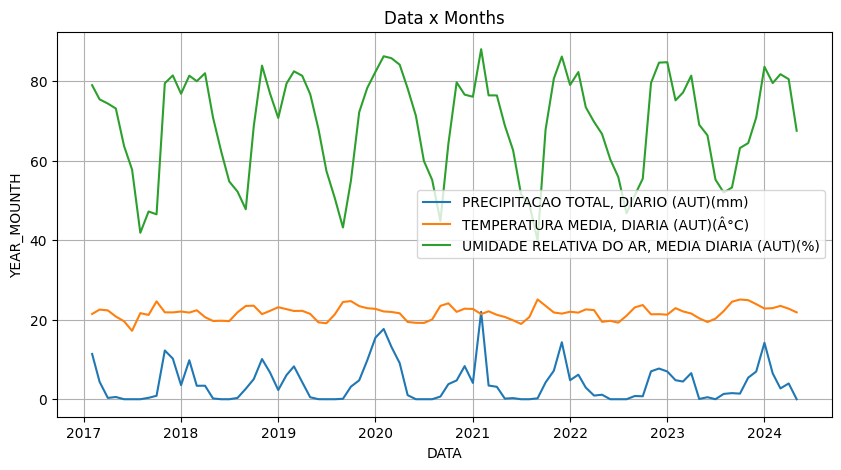

In [31]:
data_dir = "../Data/Auto"
filepaths = glob.glob(os.path.join(data_dir, "*.csv"))
stations = []
for i, file in enumerate(filepaths): 
    if 'A008' in file: #SKIP A008 STATION BE COUSE ARE NOT IN OPPERATION SINCE 2013
        continue  
    stations.append(data_start(file))
    
for i in range(len(stations)):
    # display(stations[i])
    plot(stations[i])

In [ ]:
def apply_convolution(x, window):
    conv = np.repeat([0., 1., 0.], window)
    filtered = signal.convolve(x, conv, mode='same') / window
    return filtered
window_ = len(df_treated)/10
df_treated['denoise_temp'] = apply_convolution(df_treated['TEMPERATURA MÉDIA HORA (°C)'], window_)
# plot(df_treated[['TEMPERATURA MÉDIA HORA (°C)', 'year_month']])
df_treated['MA'] = df_treated['TEMPERATURA MÉDIA HORA (°C)'].rolling(window = window_).mean()
plot(df_treated)
# plt.ylabel('Temperature (deg C)')
# df_treated['MA'].plot(figsize=(8,4), color="tab:red", title="Rolling mean over annual periods")
df_treatedm = pd.DataFrame()
df_treatedm['s'] = df_treated['denoise_temp'] - df_treated['MA']
df_treatedm['s'] = df_treatedm['s'].dropna()
df_treatedm['s'][df_treatedm['s'].tail(n=1).index] = 0
df_treatedm['s'][df_treatedm['s'].tail(n=1).index-1] = 0
df_treatedm['s'][df_treatedm['s'].tail(n=1).index-2] = 0
df_treatedm.plot(figsize=(12,6))

NameError: name 'df_treated' is not defined

In [ ]:
fft_ = np.fft.fft(df_treated['TEMPERATURA MÉDIA HORA (°C)'])
fft_freq = fftfreq = np.fft.fftfreq(len(df_treated['TEMPERATURA MÉDIA HORA (°C)']))*len(df_treated['TEMPERATURA MÉDIA HORA (°C)'])/(df_treated.index.max()-df_treated.index.min())
plt.subplot(1, 2, 1)
plt.xlabel("Frquency Domain")
plt.ylabel("Amplitude")
plt.plot(len(fft_), fft_)
plt.subplot(1, 2, 2)
plt.show()